<a href="https://colab.research.google.com/github/reyhanfarrafi/Disease-Detection-Model-Algorithm/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving TA_Dataset1.csv to TA_Dataset1.csv


In [ ]:
# Load the dataset
df = pd.read_csv('TA_Dataset1.csv', on_bad_lines='skip')

In [ ]:
# List of categorical columns to be encoded
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

In [ ]:
# Apply label encoding to each of the categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Split features and target variable
X = df.drop('Outcome Variable', axis=1)
y = df['Outcome Variable']

In [ ]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the Deep Neural Network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
# Train the model with the EarlyStopping callback
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],  # Include the callback here
    verbose=1
)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5985 - loss: 0.6519 - val_accuracy: 0.7172 - val_loss: 0.5545
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6911 - loss: 0.5604 - val_accuracy: 0.7643 - val_loss: 0.4831
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.5017 - val_accuracy: 0.7930 - val_loss: 0.4443
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.4708 - val_accuracy: 0.8094 - val_loss: 0.4080
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7892 - loss: 0.4308 - val_accuracy: 0.8217 - val_loss: 0.3716
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8055 - loss: 0.4091 - val_accuracy: 0.8545 - val_loss: 0.3467
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8182 - loss: 0.3790 - val_accuracy: 0.8627 - val_loss: 0.3120
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.3470 - val_accuracy: 0.8893 - val_loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9930 - loss: 0.0322 
Test Accuracy: 99.18%


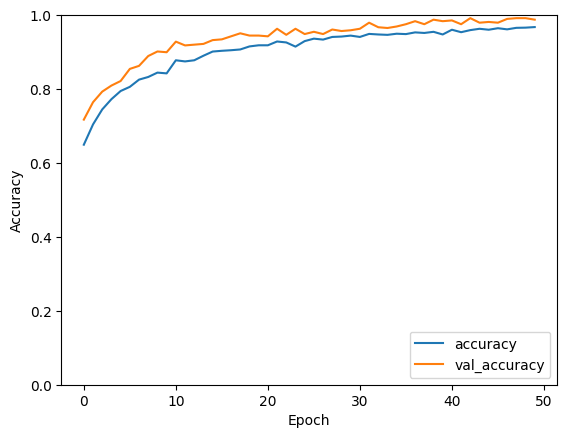

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

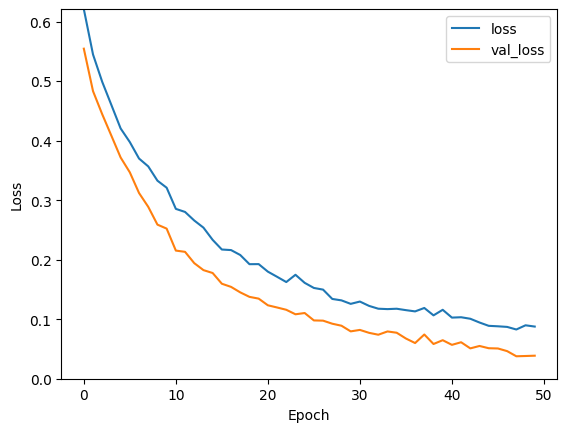

In [ ]:
# Plot loss over epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(history.history['loss'] + history.history['val_loss'])])
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       229
     Class 1       0.99      0.99      0.99       259

    accuracy                           0.99       488
   macro avg       0.99      0.99      0.99       488
weighted avg       0.99      0.99      0.99       488



In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

In [ ]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.2f}")

Sensitivity: 0.99


In [ ]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.99


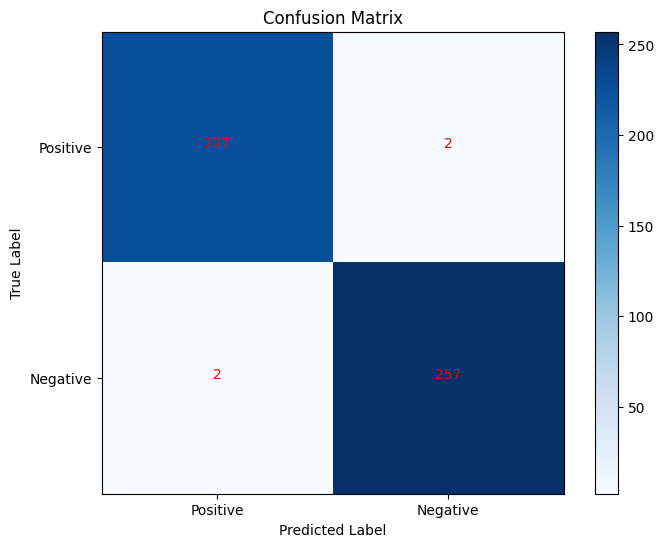

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Positive', 'Negative'])
plt.yticks(tick_marks, ['Positive', 'Negative'])
# Adding text annotations for confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='red')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()